In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create the maze environment
maze = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 1, 0, 0, 0, 1, 0, 0, 1],
    [1, 0, 1, 0, 1, 0, 1, 0, 1, 1],
    [1, 0, 0, 0, 1, 0, 0, 0, 0, 1],
    [1, 1, 1, 0, 1, 1, 1, 1, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 1, 0, 1],
    [1, 0, 0, 0, 1, 1, 0, 0, 0, 1],
    [1, 1, 1, 0, 1, 0, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 1, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
])
MAZE_SIZE = maze.shape[0]

# Start, sub-goal, and end goal positions
start_position = (1, 1)
sub_goal_position = (5, 3)
end_goal_position = (7, 8)

# Actions the agent can take: Up, Down, Left, Right
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]


In [2]:
gamma = 0.8         # Discount factor
theta = 1e-5       # Convergence threshold

# Initialize value function
value_function = np.zeros(maze.shape)

# Reward matrix
reward_matrix = np.full(maze.shape, -1.0)  # Negative reward for each step
reward_matrix[sub_goal_position] = 10.0    # Reward for reaching sub-goal
reward_matrix[end_goal_position] = 500.0   # Reward for reaching end goal

# Value Iteration Algorithm with metrics tracking
def value_iteration():
    global value_function
    convergence_iterations = 0  # Initialize convergence iteration count
    while True:
        delta = 0  # Initialize maximum change in value function
        convergence_iterations += 1  # Increment iteration count
        # Iterate over all states
        for x in range(MAZE_SIZE):
            for y in range(MAZE_SIZE):
                if maze[x, y] == 0:  # Only consider open cells
                    v = value_function[x, y]  # Store current value
                    # Calculate the value for each action
                    action_values = []
                    for action in actions:
                        next_x, next_y = x + action[0], y + action[1]
                        if 0 <= next_x < MAZE_SIZE and 0 <= next_y < MAZE_SIZE and maze[next_x, next_y] == 0:
                            action_value = reward_matrix[next_x, next_y] + gamma * value_function[next_x, next_y]
                        else:
                            action_value = -100.0  # Penalty for hitting a wall or going out of bounds
                        action_values.append(action_value)

                    # Update value function
                    value_function[x, y] = max(action_values)
                    # Update delta for convergence check
                    delta = max(delta, abs(v - value_function[x, y]))
        
        # Check for convergence
        if delta < theta:
            break
            
    return convergence_iterations  # Return the number of iterations for convergence

# Run value iteration
convergence_speed = value_iteration()


In [3]:
# Extract policy from the value function
def extract_policy():
    policy = np.full(maze.shape, -1)  # Policy initialization
    for x in range(MAZE_SIZE):
        for y in range(MAZE_SIZE):
            if maze[x, y] == 0:  # Only consider open cells
                action_values = []
                for action in actions:
                    next_x, next_y = x + action[0], y + action[1]
                    if 0 <= next_x < MAZE_SIZE and 0 <= next_y < MAZE_SIZE and maze[next_x, next_y] == 0:
                        action_value = reward_matrix[next_x, next_y] + gamma * value_function[next_x, next_y]
                    else:
                        action_value = -100.0  # Penalty for hitting a wall or going out of bounds
                    action_values.append(action_value)
                
                # Find the best action based on the value function
                best_action = np.argmax(action_values)
                policy[x, y] = best_action
    return policy

optimal_policy = extract_policy()


In [4]:
# Function to extract the optimal path from start to goal using the policy
def extract_v_path(start, goal):
    state = (start[0], start[1])
    path = [state[:2]]
    steps_to_sub_goal = 0  # Count steps to sub-goal
    steps_to_end_goal = 0  # Count steps to end goal
    
    while state != goal:
        action_idx = int(optimal_policy[state[0], state[1]])
        action = actions[action_idx]
        next_x = state[0] + action[0]
        next_y = state[1] + action[1]
        
        if 0 <= next_x < MAZE_SIZE and 0 <= next_y < MAZE_SIZE and maze[next_x, next_y] == 0:
            state = (next_x, next_y)
            path.append(state)

            # Check if the agent reached the sub-goal or end goal
            if state == sub_goal_position:
                steps_to_sub_goal = len(path)  # Count steps to sub-goal
            if state == end_goal_position:
                steps_to_end_goal = len(path)  # Count steps to end goal
        else:
            break  # Invalid move, stop the path

    return path, steps_to_sub_goal, steps_to_end_goal


In [5]:

# Extract the path from start to end goal (sub-goal is included)
full_v_path, steps_to_sub_goal, steps_to_end_goal = extract_v_path(start_position, end_goal_position)

print("Optimal Path from Value Iteration:", full_v_path) 
print("Steps to Sub-goal:", steps_to_sub_goal)
print("Steps to End Goal:", steps_to_end_goal)
print("Convergence Speed (Iterations):", convergence_speed)


Optimal Path from Value Iteration: [(1, 1), (2, 1), (3, 1), (3, 2), (3, 3), (4, 3), (5, 3), (5, 4), (5, 5), (5, 6), (6, 6), (6, 7), (6, 8), (7, 8)]
Steps to Sub-goal: 7
Steps to End Goal: 14
Convergence Speed (Iterations): 47


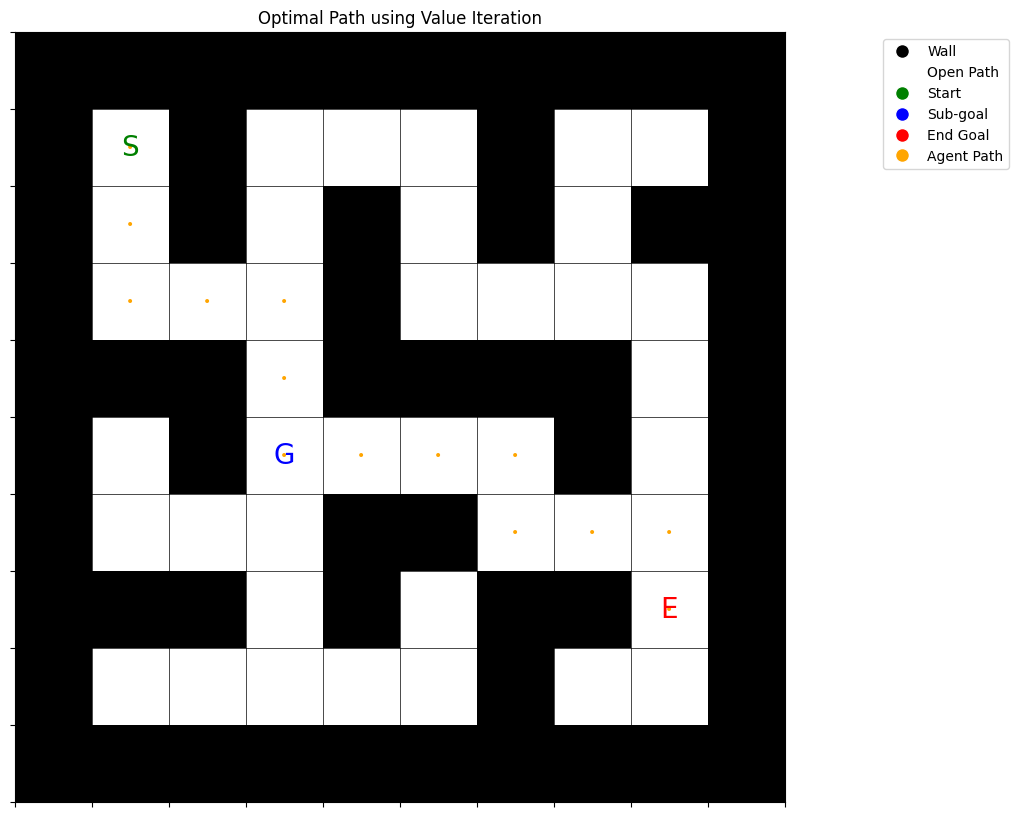

In [6]:
# Function to visualize the agent's path
def visualize_path(path, title):
    plt.figure(figsize=(10, 10))
    plt.imshow(maze, cmap="gray_r")
    for (x, y) in path:
        plt.text(y, x, '•', color='orange', ha='center', va='center', fontsize=10)
    plt.text(start_position[1], start_position[0], 'S', color='green', ha='center', va='center', fontsize=20)
    plt.text(sub_goal_position[1], sub_goal_position[0], 'G', color='blue', ha='center', va='center', fontsize=20)
    plt.text(end_goal_position[1], end_goal_position[0], 'E', color='red', ha='center', va='center', fontsize=20)
    plt.title(title)
    plt.grid(True, which='both', color='black', linewidth=0.5)
    plt.xticks(np.arange(-.5, MAZE_SIZE, 1), [])
    plt.yticks(np.arange(-.5, MAZE_SIZE, 1), [])
    
    # Legend/map for a better visualization
    labels = ['Wall', 'Open Path', 'Start', 'Sub-goal', 'End Goal', 'Agent Path']
    colors = ['black', 'white', 'green', 'blue', 'red', 'orange']
    patches = []

    for i in range(len(labels)):
        label = labels[i]
        color = colors[i]
        patch = plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10)
        patches.append(patch)

    plt.legend(handles=patches, loc='upper right', bbox_to_anchor=(1.3, 1))
    
    plt.show()

# Visualize the path taken by the agent
visualize_path(full_v_path, "Optimal Path using Value Iteration")

